# Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

### Loading libraries & the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:

df = pd.read_csv("/Users/houleyeanne/Documents/GitHub/WEEK5/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


## Part 1: Understanding Product Categories

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

### Frequency Tables:

* Generate a frequency table for the product category.
* Which are the top 5 most listed product categories?

In [6]:
#Generate a frequency table for the product category.

frequency = df['category'].value_counts()

frequency

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Plugs                                        107
Alexa Built-In Devices                       107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [7]:
#Which are the top 5 most listed product categories?

top_5 = frequency.head(5)

top_5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

### Visualizations:

* Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
* For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [ ]:
shark_attacks_USA_df=shark_attacks_USA_df[['Date','Year','State','Location','Activity','Sex', 'Age', 'Injury','Species ']] 

In [29]:
frequency = frequency[["Sports & Outdoors", "Beauty", "Handmade Clothing, Shoes & Accessories", "Bath & Body", "Birthday Gifts"]]

frequency.head()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

/var/folders/11/hbm7kx2s11j_b5bzk_j67_740000gn/T/ipykernel_8605/118695097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency.index, y=frequency.values, palette="Set3");


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(3, 0, 'Bath & Body'),
  Text(4, 0, 'Birthday Gifts')])

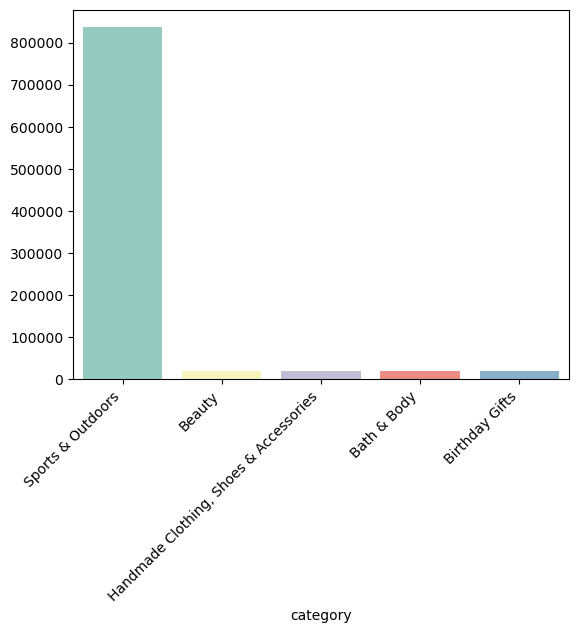

In [31]:
#Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

sns.barplot(x=frequency.index, y=frequency.values, palette="Set3");
plt.xticks(rotation=45, ha="right")

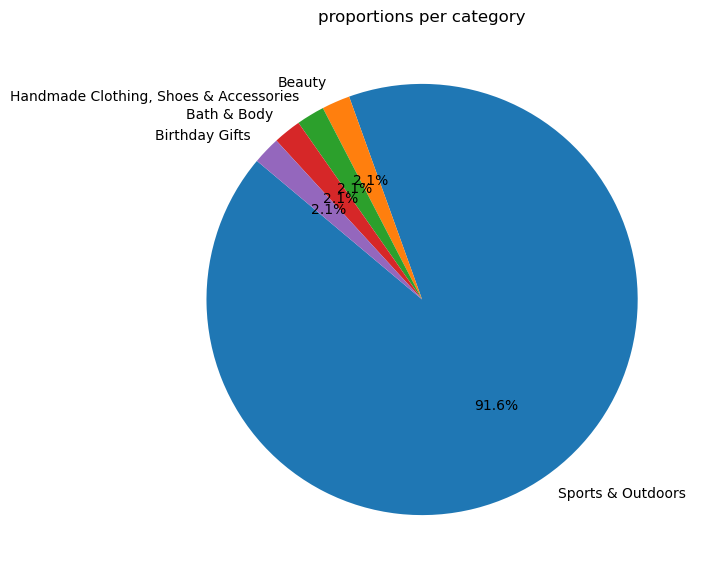

In [45]:
#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

plt.figure(figsize=(10, 7))
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=140)  
plt.title('proportions per category')
plt.show()

## Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

### Measures of Centrality:

* Calculate the mean, median, and mode for the price of products.
* What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [9]:
#Calculate the mean, median, and mode for the price of products.

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [12]:
#What's the average price point of products listed? How does this compare with the most common price point (mode)?

average_price_point = df['price'].mean()
mode_price = df['price'].mode()[0]

average_price_point, mode_price

(89.24380943923663, 9.99)

The fact that the mode is much lower than the average indicates that the majority of products are clustered around a more affordable price point (9.99). The significant gap between the average price (approximately 89.24) and the mode of the prices (9.99) suggests a distribution of Amazon UK's product prices with a long tail of higher values, where a few expensive products push up the average beyond the most commonly observed price point.

### Measures of Dispersion:

* Determine the variance, standard deviation, range, and interquartile range for product price.
* How varied are the product prices? Are there any indicators of a significant spread in prices?

In [13]:
#* Determine the variance, standard deviation, range, and interquartile range for product price.

df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [22]:
standard_deviation = df['price'].std()
variance = df['price'].var()
range = df['price'].max() - df['price'].min()

standard_deviation, variance, range

(345.60886175352226, 119445.48532256528, 100000.0)

Interquartile range for product price.

Q3 (75th percentile) of price = 45.9 

Q1 (25th percentile) of price = 9.99

IQR = 45.99 − 9.99 = 36.00


* How varied are the product prices? Are there any indicators of a significant spread in prices?

There is a significant spread in the prices of products on Amazon UK. The data shows that while most products have prices concentrated within a relatively narrow middle range (as indicated by the IQR), there are some products with extremely high prices, leading to a large overall range and high standard deviation. This suggests a very diverse set of products, from very affordable to highly expensive.

### Visualizations:

* Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
* Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

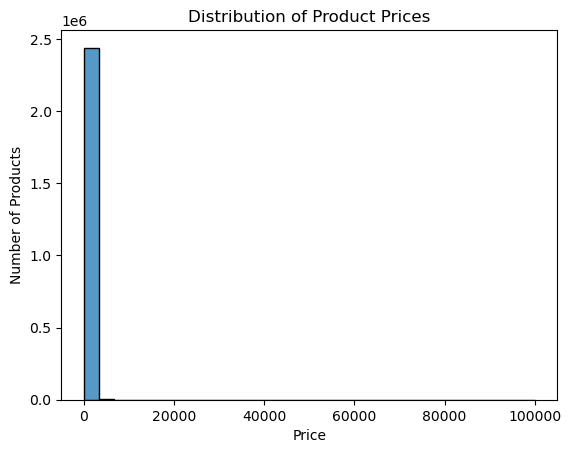

In [36]:
#Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..

sns.histplot(df['price'], bins=30, kde=False)
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.title('Distribution of Product Prices')
plt.show()

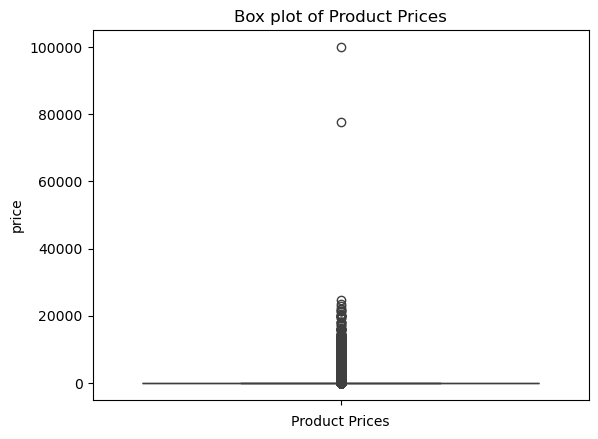

In [32]:
sns.boxplot(y='price', data=df) 

plt.title('Box plot of Product Prices')
plt.xlabel('Product Prices')
plt.show()

# Part 3: Unpacking Product Ratings

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

### Measures of Centrality:

* Calculate the mean, median, and mode for the rating of products.
* How do customers generally rate products? Is there a common trend?

In [45]:
df['stars'].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [42]:
 #Calculate the mean, median, and mode for the rating of products.

mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating

(2.152836472966065, 0.0, 0.0)

* How do customers generally rate products? Is there a common trend?

Given the mean, median, and mode of product ratings on Amazon (2.152836472966065, 0.0, 0.0, respectively) out of 5, it suggests that customers generally rate products poorly. The common trend indicates a significant number of products receiving the lowest possible rating (0.0), as both the median and mode are 0.0, highlighting widespread dissatisfaction or a trend of not rating products unless customers are unhappy.

### Measures of Dispersion:

* Determine the variance, standard deviation, and interquartile range for product rating.
* Are the ratings consistent, or is there a wide variation in customer feedback?

In [50]:
#Determine the variance, standard deviation, and interquartile range for product rating.

variance_rating = df['stars'].var()
std_rating = df['stars'].std()

variance_rating, std_rating


(4.81743402976196, 2.1948653785054697)

* Are the ratings consistent, or is there a wide variation in customer feedback?

Given the variance (4.81743402976196) and standard deviation (2.1948653785054697) of the ratings assigned to Amazon products, these statistics indicate a wide variation in customer feedback. The substantial standard deviation, in comparison to the scale of 0 to 5 for ratings, suggests that customer opinions on products are quite diverse, with significant inconsistency in how products are rated.

### Shape of the Distribution:

* Calculate the skewness and kurtosis for the rating column.
* Are the ratings normally distributed, or do they lean towards higher or lower values?

In [51]:
skewness_rating= df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

### Visualizations:

* Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: xlabel='stars', ylabel='Count'>

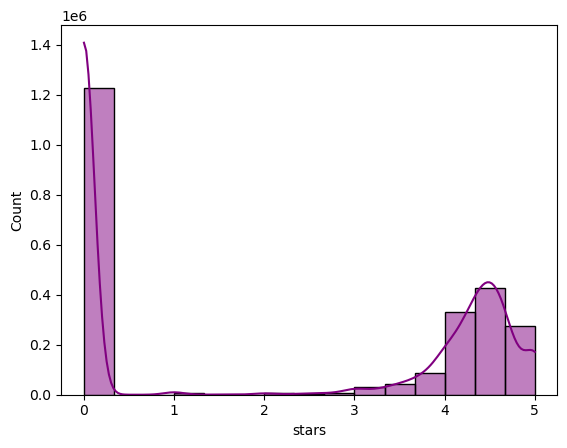

In [54]:
sns.histplot(df['stars'], kde=True, bins=15, color="purple")

0 stars are the most common rating. Among the rated products, 4-star ratings seem to be the most common, closely followed by 5 stars. This indicates a tendency for users to rate products favorably on Amazon.